# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определить рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видны пропуски в колонках, так же неверные типы данных. К примеру колонка first_day_exposition имеет тип object, хотя должен быть DataTime.Колонка is_apartment с object, хотя должен быть bool.

In [3]:
#Вывожу первые 5 строк датасета.
pd.set_option('display.max_columns', None)
data.head(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


';'

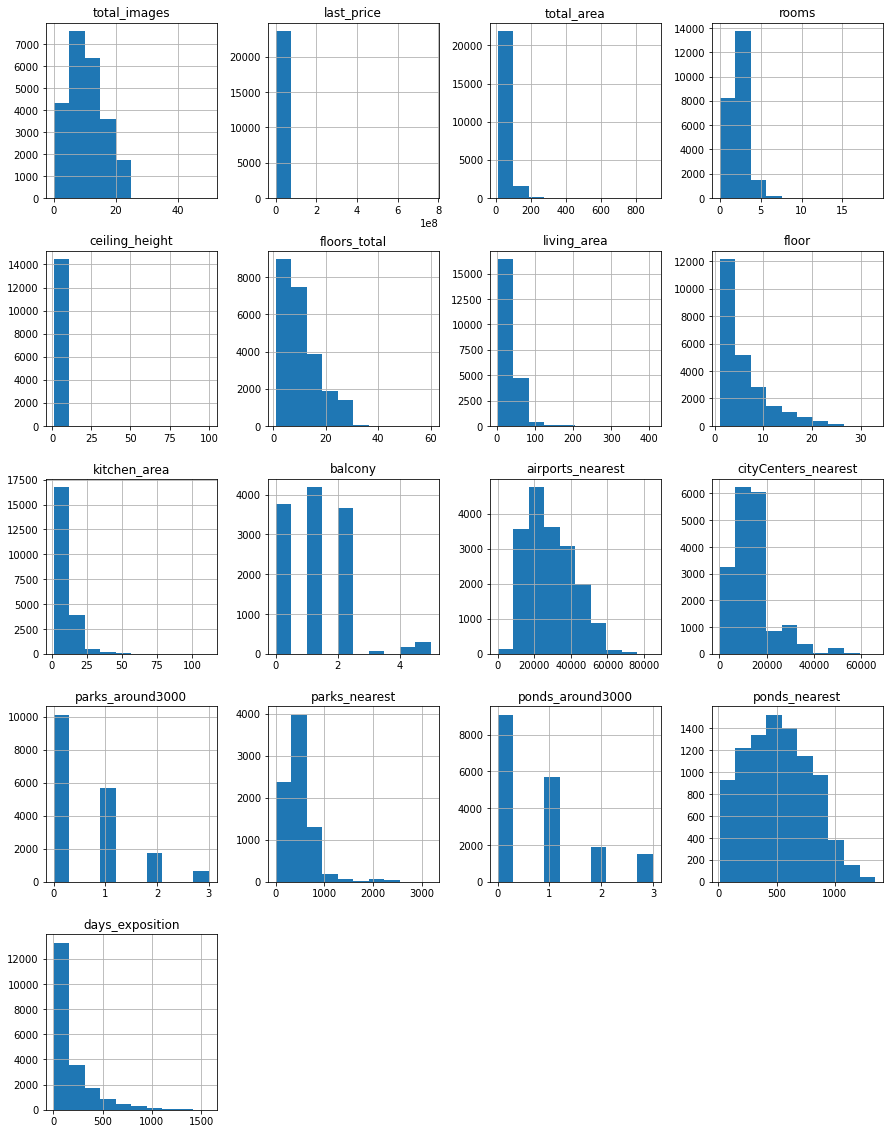

In [4]:
#Вывожу гистограммы для каждого числового столбца датасета. Данные пока не корректировались.
data.hist(figsize=(15, 20))
";"

В ряде колонок имеются пропуски, об этом свидетельствуют строки со значениями NaN. Так же имеются выбросы в данных, это хорошо видно на гистограммах, аномальные значения можно увидеть в колонке с общей площадью квартиры к примеру со значением в 159 квадратных метров. Некоторые типы данных следует поменять на привычные, для удобного анализа, к примеру float на int.  

### Предобработка данных

In [5]:
#В колонке балконы заполняем пропуски нулями т.к. если продавец не указал кол во балконов - значит их просто нет. 
#Так же меняю тип данных на int для удобного анализа и визуализации. 
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

#Меняю тип данных на int для удобства анализа и визуализации
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], errors='coerce')).astype('Int64')
data['ponds_around3000'] = np.floor(pd.to_numeric(data['ponds_around3000'], errors='coerce')).astype('Int64')
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

data['is_apartment'] = data['is_apartment'].astype('bool')
data['last_price'] = data['last_price'].astype('int')


#first_day_exposition - object - должен быть тип datetime, меняю тип данных и заполняю пропуски нулями.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%d')

#проверка заполнения пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Колонку "всего этажей в доме" заполняем медианными значениями. Медиана усточевее к выбросам, и нулями не заполнить т.к. 
#0 этажного здания не существует.
data['floors_total'].value_counts().head(20)
flor_avg = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(flor_avg)
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].isna().sum()


0

In [7]:
# Обработка неявных дубликатов. Привеодим все общие категории к единому виду. 
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции','посёлок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','деревня')
data['locality_name'] = data['locality_name'].str.replace('посёлок Пансионат','Пансионат')
data['locality_name'] = data['locality_name'].str.replace('посёлок станции','посёлок')
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'деревня Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'посёлок Аннино', 'посёлок Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'посёлок Торковичи',
       'посёлок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосн

In [8]:
data['locality_name'].value_counts()

Санкт-Петербург          15721
посёлок Мурино             556
посёлок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
деревня Раздолье             1
посёлок Свирьстрой           1
село Никольское              1
деревня Трубников Бор        1
посёлок Ромашки              1
Name: locality_name, Length: 318, dtype: int64

In [9]:
#Меняю пустые значения на медиану. Делаю срез без слишком низких и слишком высоких значений. 
#Считаю медиану из уже чистых данных.
data['low_height'] = data['ceiling_height'] < 2.4
data['max_height'] = data['ceiling_height'] > 3
too_fast_stat = data.pivot_table(index='locality_name', values='low_height')
good_ids = too_fast_stat.query('low_height < 0.5')
good_data = data.query('locality_name in @good_ids.index')
good_data = good_data.query('2.4 <= ceiling_height <= 3')
good_data['locality_name'].count()
good_stations_stat = good_data.pivot_table(index='locality_name',values='ceiling_height',aggfunc='median')

#Заполняю пропуски медианным значением из чистых данных 
data['ceiling_height'] = data['ceiling_height'].fillna(2.55)
data['ceiling_height'].describe()

count    23699.000000
mean         2.685559
std          0.992411
min          1.000000
25%          2.550000
50%          2.550000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
#Избавляюсь от странных значений путём их замены на медианные значения 
data['ceiling_height'] = data['ceiling_height'].replace(3. ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(4.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(25.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(2.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(5.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(32.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(8.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(27.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(24.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(26.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(8.3 ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(5.5 ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(14.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(20.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(6.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(22.6 ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(27.5 ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(10.3 ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(1.  ,2.55)
data['ceiling_height'] = data['ceiling_height'].replace(100.  ,2.55)
data['ceiling_height'].astype('int')
data['ceiling_height'].unique()

array([2.7 , 2.55, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15, 3.5 ,
       3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66, 2.59, 2.45,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 5.3 , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65, 3.9 , 3.18, 3.35, 2.3 ,
       3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36,
       3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14,
       4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32,
       1.2 , 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02,
       3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51,
       3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 1.

Причины:
1.	Человеческий фактор.
2.	Нет информации о ближайших парках и аэропортах, либо их простонет рядом, и указывать расстояние нет смысла.
3.	Техническая ошибка при выгрузке.
4.	Собственник просто не захотел или не знал или забыл указать этаж, размер жил площади, размер кухни.

Поменял типы данных с float на int в колонках для простоты подсчёта и удобства восприятия чисел и визуализации данных. Что бы избавиться от чисел с плавающей точкой и рассматривать только целочисленные данные.
balcony,parks_around3000,ponds_around3000,cityCenters_nearest,days_exposition.
Сменил тип данных с obj на datatime колонку first_day_exposition, т.к. она имеет данные по датам подачи объявлений. 
Колонку is_apartment поменял на bool т.к. в описании данных указан булев тип. 



In [11]:
#Проверяю долю слишком высоких значений цены от основной массы данных
data['last_price'].value_counts().sort_values(ascending=False)
#С помощью коробки с усами определил что выбросом будут все значения более примерно 11 млн.
#Берём квартиры со значениями более 11 млн и посмотрим какой процент они составляют от общей массы данных. 
len(data.query('last_price > 11000000')) / len(data)*100

9.637537448837504

In [12]:
#Проверил значения по количеству квартир.
#Видно что есть высокие значения с 19 - 12 комнатами.
#Т.к. таких данных не много, думаю их можно отбросить.
data['rooms'].value_counts()
#Посмотрел какое количество в процентном соотношении таких данных во всем датасете
len(data.query('rooms > 9')) / len(data)*100

0.04641546056795645

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

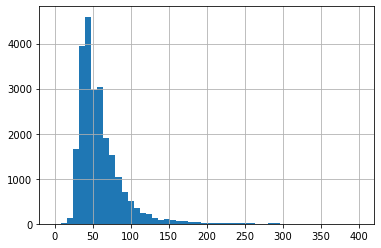

In [13]:
# На графике видно что основное нормальное распределение данных относится к интервалу от 25 до 100 квадратных метров
# Следовательно эти значения будет считать верхним и нижними парогами значений. Все остальные данные можно отбросить.
data['total_area'].hist(bins=50,range=(0,400))
data['total_area'].describe()

In [14]:
#Посмотрим какое количество данных с высоким парогом от общей массы датасета
len(data.query('total_area > 100')) / len(data)*100

7.747162327524368

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.634251,10.667750,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.212839,6.585961,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.550000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.650000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [16]:
#Создаю новые датасеты с фильтрацией и без.
new_data = data.query('last_price > 11000000 and rooms > 9 and total_area > 100')
old_data = data
#Смотрим общее количество данных в датасете без фильтра.
old_data.shape[0]

23699

In [17]:
#Считаю количество отбрасываемых данных по аномальным значениям в столбцах last_price,rooms,total_area.
new_data.shape[0]/old_data.shape[0]*100

0.04641546056795645

Провел анализ аномальных значений в других series основного датасета. Что бы понять как сильно повлияет удаление таких аномальных значений, посчитал процентное соотношение таких данных ко всему дтасету. Что бы данные не сильно искажались количество удалённой информации не должно превышать 10% , в нашем случае количество данных составило 0,04 процента. Т.к. данных не так много считаю что нет смысла тратить время на их удаление. 

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
#Рассчитываю стоимость квадратного метра 
data['price_per_square_meter'] = data['last_price']/data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

#Подача объявления по дню недели 
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday

#Подача объявления по месяцу
data['month_of_publication'] = data['first_day_exposition'].dt.month

#Подача объявления по году и сортировка по возрастанию 
data['year_of_publication'] = data['first_day_exposition'].dt.year
data['year_of_publication'].sort_values()

#Функция для определения типа этажа 
def floor_type(row):
    col = row['floors_total']
    floor_total = row['floor']
    if floor_total == 1:
        return 'Первый'
    elif floor_total == col:
        return 'Последний'
    elif 1<floor_total<col:
        return 'Другой'
    
data['аpartment_floor_type'] = data.apply(floor_type, axis=1)

#расстояние до центра города в километрах
data['distance_to_center'] = data['cityCenters_nearest']/1000
data['distance_to_center'] = np.floor(pd.to_numeric(data['distance_to_center'], errors='coerce')).astype('Int64')
data['distance_to_center'].value_counts().sort_values(ascending=False).head(20)

12    1517
14    1512
11    1415
13    1402
15    1373
16    1107
4      916
10     913
5      770
9      693
8      676
17     607
3      530
6      470
7      407
18     347
2      307
30     262
19     258
1      242
Name: distance_to_center, dtype: Int64

### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

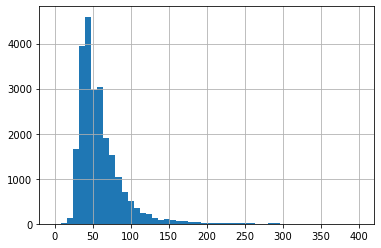

In [19]:
data['total_area'].hist(bins=50,range=(0,400))
data['total_area'].describe()

Распределение данных нормальное, есть выбросы но они не сильно влияют на данные.

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

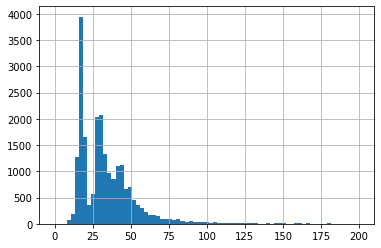

In [20]:
data['living_area'].hist(bins=75,range=(0,200))
data['living_area'].describe()

Есть выбросы, это похоже на распределение Пуассона, оно становится симметричным и стремится к нормальному.

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

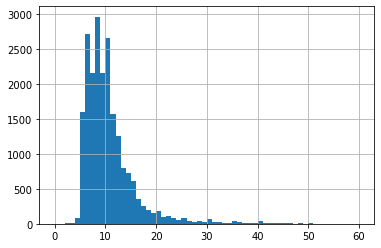

In [21]:
data['kitchen_area'].hist(bins=60,range=(0,60))
data['kitchen_area'].describe()

Это нормальное распределение данных, т.к. видно что большенство квартир находится в диапазоне от 5 до 12 квадратных метров и реже значения более 20 квадратных метров. Есть незначительные выбросы но они не сильно влияют на общую картину.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

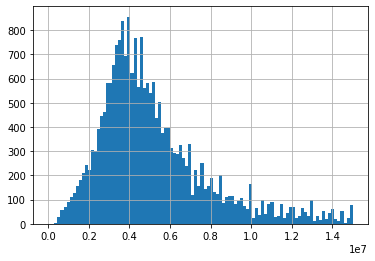

In [22]:
data['last_price'].hist(bins=100,range=(0,15000000))
data['last_price'].describe()

Наиболее частые (типичные, нормальные) значения оказываются посередине. А редкие — по краям. График симметричен и напоминает колокол. Такое распределение называется нормальным. Взял строку с описанием из теории))

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

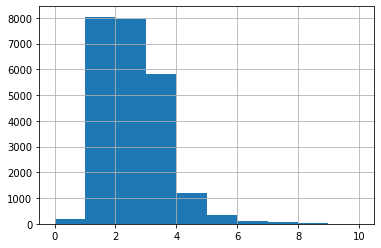

In [23]:
data['rooms'].hist(bins=10,range=(0,10))
data['rooms'].describe()

В таком случае распределение Пуассона обрезано на нуле и имеет длинный «хвост» в положительную сторону. И движется к нормальному распределению. 

count    23699.000000
mean         2.634251
std          0.212839
min          1.200000
25%          2.550000
50%          2.550000
75%          2.650000
max          5.800000
Name: ceiling_height, dtype: float64

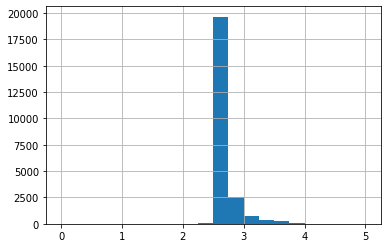

In [24]:
data['ceiling_height'].hist(bins=20,range=(0,5))
data['ceiling_height'].describe()

Нужно обратить внимание на Q1 и медиану, данные схожи, тем не менее если посмотреть на среднее значедние данных. то оно не сильно отличается от медианы. Возможно это связано с тем что ранее было принято решение искажённые данные и пропуски заполнить медианным значением. Исходя из реалий эти данные похожи на нормальное распределение, есть небольшое количество(хвост) со значениями более 3 метров. но основная масса находится в стандартных значениях то 2,5 до 3 метров. 

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

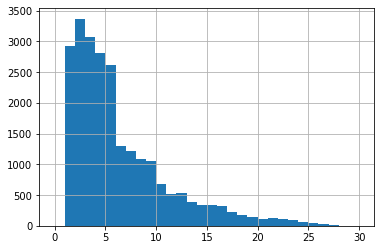

In [25]:
data['floor'].hist(bins=30,range=(0,30))
data['floor'].describe()

Это распределение Пуассона, и распределение движется к нормальному.

count     23662
unique        3
top           3
freq      17404
Name: floor_category, dtype: object

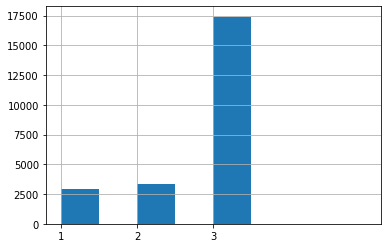

In [26]:
def categorize_income(income):
    try:
        if income == 'Первый':
            return '1'
        elif income == 'Последний':
            return '2'
        elif income == 'Другой':
            return '3'
    except:
        return 'ошибка, проверь код!'
    
data['floor_category'] = data['аpartment_floor_type'].apply(categorize_income)

data['floor_category'].sort_values().hist(bins=8,range=(0,4))
data['floor_category'].describe()

Большое количество данных распределено на 3 категорию - Другой. Это связано стем что мы не имеем данных о общем количесве этажей в доме, поэтому значения более 1 этажа но при этом менее общего количества этажей в доме расположились в данной категории. Исходя из этого необходимо либо уточнять дополнительную информацию по этажам, как и кем были вписаны эти данные что бы появилась возможность отследить логику распределения.

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

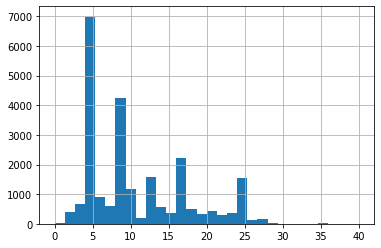

In [27]:
data['floors_total'].hist(bins=30,range=(0,40))
data['floors_total'].describe()

На графике видны отдельные всплески- так называемые шумы. Большое количество домов относится к 5 этажным и 9 этажным зданиям. Не смотря на шумы можно заметить вполне нормальное распределение данных, об этом свидетельствует небольшое отличие среднего значения от медианы. Значит выбросов не много. 

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

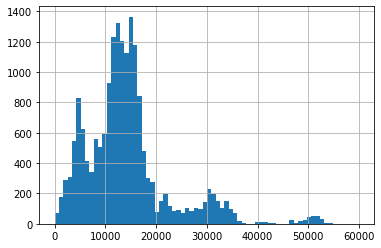

In [28]:
data['cityCenters_nearest'].hist(bins=70,range=(0,60000))
data['cityCenters_nearest'] = np.floor(pd.to_numeric(data['cityCenters_nearest'], errors='coerce')).astype('Int64')
data['cityCenters_nearest'].describe()

Большое количество данных распределено на нуле. Построим гисторграмму на болшее число корзин.

<AxesSubplot:>

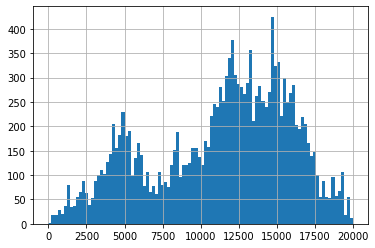

In [29]:
data['cityCenters_nearest'].hist(bins=100,range=(0,20000))

Нормальным распределением данных можно считать значения от 10000 до 17500 метров. 

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

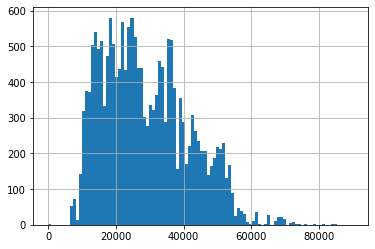

In [30]:
data['airports_nearest'].hist(bins=100,range=(0,90000))
data['airports_nearest'].describe()

Нормальное распределение данных. 

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

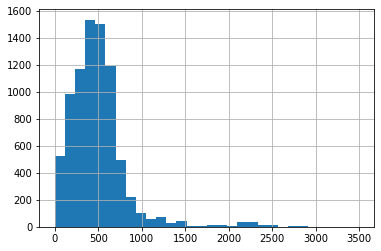

In [31]:
data['parks_nearest'].hist(bins=30,range=(0,3500))
data['parks_nearest'] = data['parks_nearest'].abs()
data['parks_nearest'].describe()

Распределение данных Пуассона и движется к нормальным значениям. 

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_week, dtype: float64

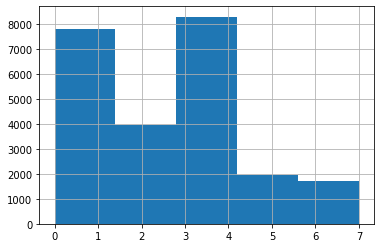

In [32]:
data['day_of_the_week'].hist(bins=5,range=(0,7))
data['day_of_the_week'].describe()

По графику видно что, чаще всего объявления подавались в период с понедельника на вторник и с четверга на пятницу. Реже в субботу и воскресенье. Видимо начало и конец рабочей недели наилучшее время для подачи объявлений.

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

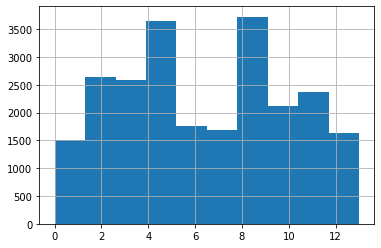

In [33]:
data['month_of_publication'].hist(bins=10,range=(0,13))
data['month_of_publication'].describe()

На графике видны шумы - отдельные высокие значения по 4-5 и 8-9 месяцам. Возможно это связано с тем что данных не так много.  

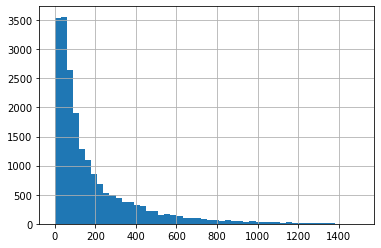

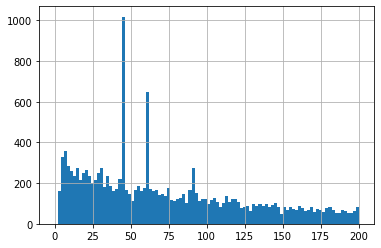

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [34]:
#Изучаю скорость продажи квартир. 

data['days_exposition'].hist(bins=50,range=(0,1500))
plt.show()
data['days_exposition'].hist(bins=100,range=(0,200))
plt.show()

data['days_exposition'].describe()

#data['days_exposition'].value_counts().sort_values().tail(10)

Среднее значение 156 дней а медиана 74.

(1.0, 1000.0)

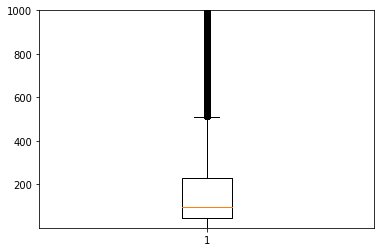

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

Вывод:<br>
Видно большое количество распределений на нуле, квартиру не могли приобрести сразу после публикации объявления, скорее это ошибка или выбросы. Стандартное отклонение говорит о том что данные не однородны т.к. отличаются от среднего значения на 213 единиц. Слишком быстрыми продажами можно считать значения менее 22 двух дней, это видно по q1. А слишком долгими продажами более примерно 500 дней. При этом на графике с большим количеством корзин видны выбросы на 0,45,60,90 день.</br>

Корреляция ровна: 0.6536539818654257


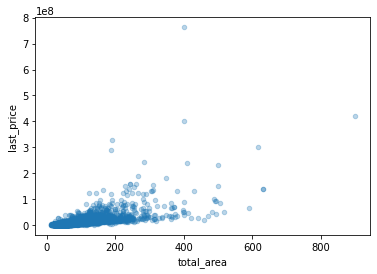

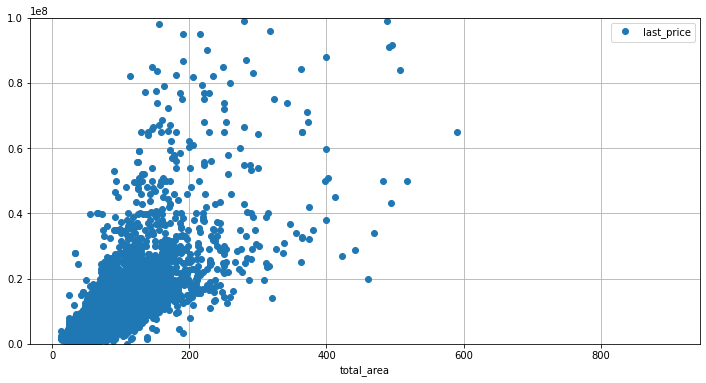

In [36]:
#Зависимость цены от общей площади 
data['last_price'] = data['last_price'].astype('int')

data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

data['total_area'] = data['total_area'].astype('int')


data.plot(kind = 'scatter', y = 'last_price', x = 'total_area', alpha = 0.3)

data.plot(x='total_area', y='last_price', 
          ylim=(0, 100000000), style='o', grid=True, figsize=(12, 6))
          
#Добавляем корреляцию
          
print('Корреляция ровна:',data['total_area'].corr(data['last_price']))


По графику видно как меняются значения цены в зависимости от общей площади. Если посмотреть на значения то 0 и до 200 можно увидеть плавное увеличение цены по отношению к общей площади, есть явная зависимость. Далее график показывает резкие скачки стоимости, это похоже на выбросы в данных. 

Корреляция ровна: 0.5664915336952651


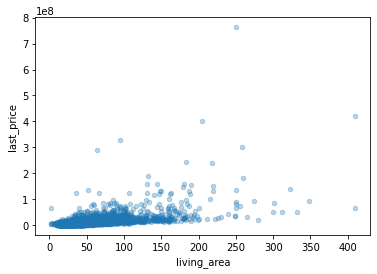

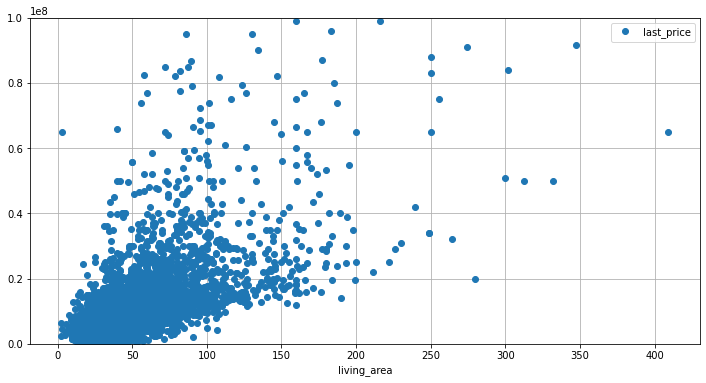

In [37]:
#Зависимость цены от жилой площади

data.plot(kind = 'scatter', y = 'last_price', x = 'living_area', alpha = 0.3)

data.plot(x='living_area', y='last_price', 
          ylim=(0, 100000000), style='o', grid=True, figsize=(12, 6))

#Добавляем корреляцию
          
print('Корреляция ровна:',data['living_area'].corr(data['last_price']))

На графике можно так же отследить тенденцию увеличения стоимости недвижимости от увеличения жилой площади. Основная часть недвижимости располагается в пределах до 100 квадратных метров. Есть редкие квартиры с высокой стоимостью в этом диапазоне. Что бы понять с чем это связано скорее придётся провести дополнительный анализ и посмотреть как влияют несколько факторов одновременно на общую стоимость. 

Корреляция ровна: 0.5198690130216392


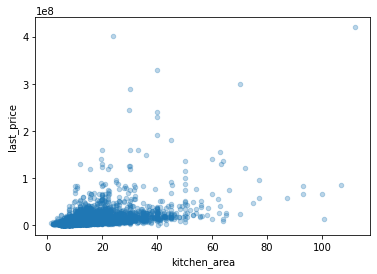

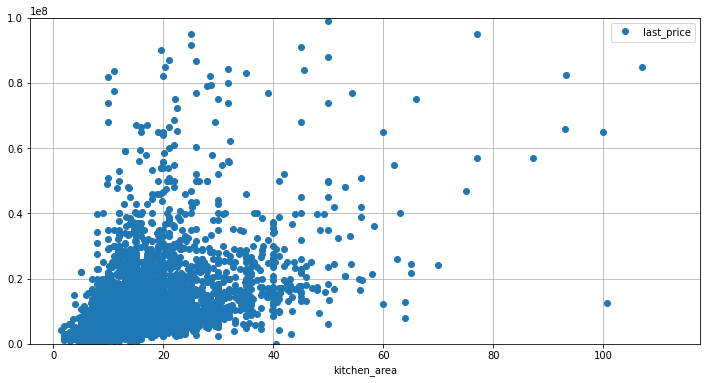

In [38]:

data.plot(kind = 'scatter', y = 'last_price', x = 'kitchen_area', alpha = 0.3)

data.plot(x='kitchen_area', y='last_price', 
          ylim=(0, 100000000), style='o', grid=True, figsize=(12, 6))

#Добавляем корреляцию
          
print('Корреляция ровна:',data['kitchen_area'].corr(data['last_price']))

В данном случае тенденция роста цены сохраняется, тем не менее уже не так ярко выражена, основное количество попадает от 10 и до 25 квадратных метров кухни. 

Корреляция ровна: 0.3633428499648948


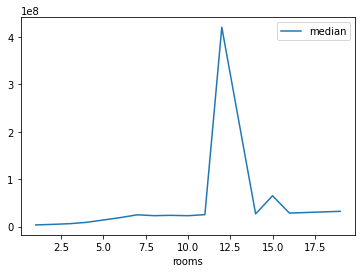

In [39]:
value_room = data.query('rooms != 0').pivot_table(index='rooms', values='last_price',aggfunc=['mean','count','median'])
value_room.columns = ['mean','count','median']
value_room.plot(y='median')

value_room

#Добавляем корреляцию
          
print('Корреляция ровна:',data['rooms'].corr(data['last_price']))

Можно видеть плавное повышение стоимости в зависимости от увеличения числа комнат. На графике виден резкий скачёк стоимости квартиры начиная с 11 и до 14 комнат. Это похоже на выброс, подтверждение можно увидет в сводной таблице, и между 11 и 14, видна строчка с 12 комнатами и не правдоподобной ценой, которая выбивается из общей массы данных. Такая квартира всего одна. и по крайней мере не понятна причина такого роста. Факторов много, возможно сам продавец посчитал что это наиболее приемлемая сумма для его недвижимости.

,mean,count,median
аpartment_floor_type,,,
Первый,4.803560e+06,2917,3900000
Последний,7.356777e+06,3341,4300000
Другой,6.676894e+06,17404,4850000


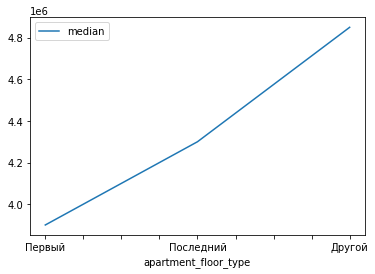

In [40]:
value_apartment_type = data.pivot_table(index='аpartment_floor_type', values='last_price',aggfunc=['mean','count','median'])
value_apartment_type.columns = ['mean','count','median']

value_apartment_type.sort_values(by='count').plot(y='median')
value_apartment_type.sort_values(by='count')

Чем выше квартира - тем выше её стоимость. Зависимость очевидна.

,mean,count,median
day_of_the_week,,,
0,6.511613e+06,3612,4650000
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


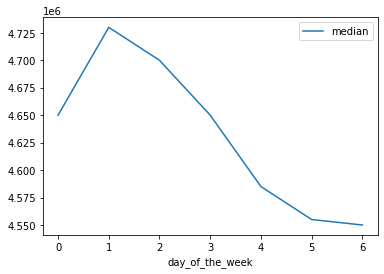

In [41]:
value_week_day = data.pivot_table(index='day_of_the_week',values='last_price',aggfunc=['mean','count','median'])
value_week_day.columns = ['mean','count','median']
value_week_day.plot(y = 'median')
value_week_day

Если посмотреть на график видно что объявления с объектами с высокой стоимостью подаются в будние дни, так же наивысшей точкой является вторник т.е. столбец с цифрой 1 и далее до 4 столбца, уже значительно ниже в субботу и воскресенье. 

,mean,count,median
month_of_publication,,,
1,6.668233e+06,1500,4600000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
4,6.737198e+06,2379,4800000
5,6.600435e+06,1274,4515000
6,6.310269e+06,1760,4400000
7,6.649337e+06,1695,4650000
8,6.350233e+06,1744,4570000
9,6.825470e+06,1981,4700000


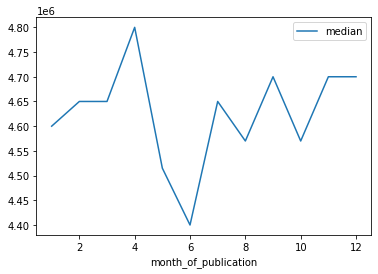

In [42]:
value_month = data.pivot_table(index = 'month_of_publication',values='last_price',aggfunc=['mean','count','median'])
value_month.columns = ['mean','count','median']
value_month.plot(y = 'median')
value_month

Стоимость квартир в течении года располагается примерно в одном диапазоне от 4.5 млн и до 4.7 млн. Так же виден скачёк на 4 колонке(апрель) со стоимостью объектов 4.8 млн, и далее резкий спад в течении 2- х месяцев до минимума 4.4 млн. В данном случае нет каких то точных факторов которые могли повлиять на стоимость недвижимости в этот периуд. Нужно проводить глубокий анализ,  или же уточнить дополнительно информацию заполнении этих данных, что бы понять является ли данное движение цены закономерностью или же это случайность. 

,mean,count,median
year_of_publication,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2016,6.827912e+06,2783,4550000
2017,6.585729e+06,8190,4500000
2018,5.950966e+06,8519,4550000
2019,6.782388e+06,2879,5050000


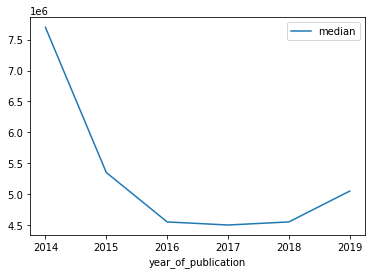

In [43]:
value_year = data.pivot_table(index='year_of_publication', values='last_price', aggfunc=['mean','count','median'])
value_year.columns = ['mean','count','median']
value_year.plot(y = 'median')
value_year

Спад стоимости недвижимости очивиден пографику, но так же заметен небольшой рост стоимости начиная с 2018 года.

In [44]:
#Населённые пункты с наибольшим числом объявлений и средняя цена за квадратный метр 
average_price_per_square_meter = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
average_price_per_square_meter.columns = ['count', 'mean']
average_price_per_square_meter = average_price_per_square_meter.sort_values('count', ascending = False).head(10)
average_price_per_square_meter

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,556,85681.305755
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [45]:
#Населённый пункт с самой высокой стоимостью за квадратный метр 
average_price_per_square_meter[average_price_per_square_meter['mean']==average_price_per_square_meter['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [46]:
#Населённый пункт с самой низкой стоимостью за квадратный метр
average_price_per_square_meter[average_price_per_square_meter['mean']==average_price_per_square_meter['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


In [47]:
#Расстояние до центра в километрах
data['distance_to_center']
#Тут смогу лишь получить стоимость одного километра для каждого объекта в Питере 
data['distance_to_SPB'] = data[data['locality_name'] == 'Санкт-Петербург']['distance_to_center']
data['cost_SPB'] = data[data['locality_name'] == 'Санкт-Петербург']['last_price']
top = data.pivot_table(index='distance_to_SPB',values='cost_SPB',aggfunc='mean')
top.sort_values(by='cost_SPB')

#выделите квартиры в Санкт-Петербурге
data.query('locality_name == "Санкт-Петербург"')
data['distance_to_center'] = np.floor(pd.to_numeric(data['distance_to_center'], errors='coerce')).astype('Int64').sort_values()

data['distance_to_center'].describe()

dita = data['cost_SPB']/data['distance_to_SPB']

data['distance_to_SPB'] = np.floor(pd.to_numeric(data['distance_to_SPB'], errors='coerce')).astype('Int64')


data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_SPB',values='price_per_square_meter',aggfunc='mean')


,price_per_square_meter
distance_to_SPB,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


### Общий вывод

Обработали базу данных сервиса Яндекс Недвижимость. Были выявлены проблемы с типом данных, так же имелось большое количество пропусков. <br>Поменяли типы данных с float на int, для удобства анализа в следующих колонках:</br>
<br>1.balcony</br>
<br>2.parks_around3000</br>
<br>3.ponds_around3000</br>
<br>4.last_price</br>
<br>5.cityCenters_nearest</br>
<br>6.days_exposition</br>
<br>7.floors_total</br>
<br>8.ceiling_height</br>
<br>9.distance_to_center</br>
<br>10.cityCenters_nearest</br>
<br>11.price_per_square_meter</br>
<br>12.total_area</br>

<br>Заменили пропуски нулями и медианными значениями в колонках:</br>
<br>1.balcony</br>
<br>2.floors_total</br>
<br>3.ceiling_height</br>

<br>Поменяли типы данных  на дата/время и булев тип данных в колонках:</br>
<br>1.balcony</br>
<br>2.parks_around3000</br>

Избавились от неявнух дубликатов для более точного анализа. Избавились от аномалий в столбце с высотой потолков. 

Добавили новые полезные метрики:
<br>Цена одного квадратного метра;</br>
<br>День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);</br>
<br>Месяц публикации объявления;</br>
<br>Год публикации объявления;</br>
<br>Тип этажа квартиры;</br>
<br>Расстояние до центра города в километрах.</br>

Посмотрели зваисимости общей стоимости недвижимости от ряда факторов. Увидили что на сумму влияет этаж, общая площадь и количество комнат в квартире. По графикам видно что, в течении года имеется увеличение и спад стоимости недвижимости в периуд с апреля по июнь, трудно сказать с чем это связано, нужеен более глубокий анализ. Если смотреть на зависимость цены в течении всего периода с 2014 по 2019, ярко отслеживается падение цен на недвижимость с 2014 по 2018 год, тем не менее с 2018 по 2019 год цены на недвижимость начинают рости. Данная тенденция так же хорошо отслеживается на графике по дням недели, дорогие объекты появляются в будние дни, а ближе к выходным достигают своего минимума по цене. 
Выяснили что Санкт-Петербурге недвижимость дороже в центре города нежели на окраине. 
Так же узнали что в Санкт-Петербурге самая высокая стоимость квадратного метра примерно 114848.56523 руб. В то же время в Выборге расположились объекты с наимешьней стоимостью 58141.48945 руб за квадратный метр. 
Возможно можно было бы выявить более явные зависимости, влияющие на общую стоимость квартиры, при проведении более глубокого анализа, т.е.:<br>
1.Посмотреть на то как одновременно влияет расположение квартиры от центра города с общей площадью на общую стоимость.</br>
<br>2.Посмотреть на то как влияет количество квартир площадь кухни и наличие поблизости парков или аэропортов, на общую стоимость квартиры и т.д.</br>